In [4]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [6]:
df_full = pd.read_csv('bank-full.csv', sep=";")
df_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


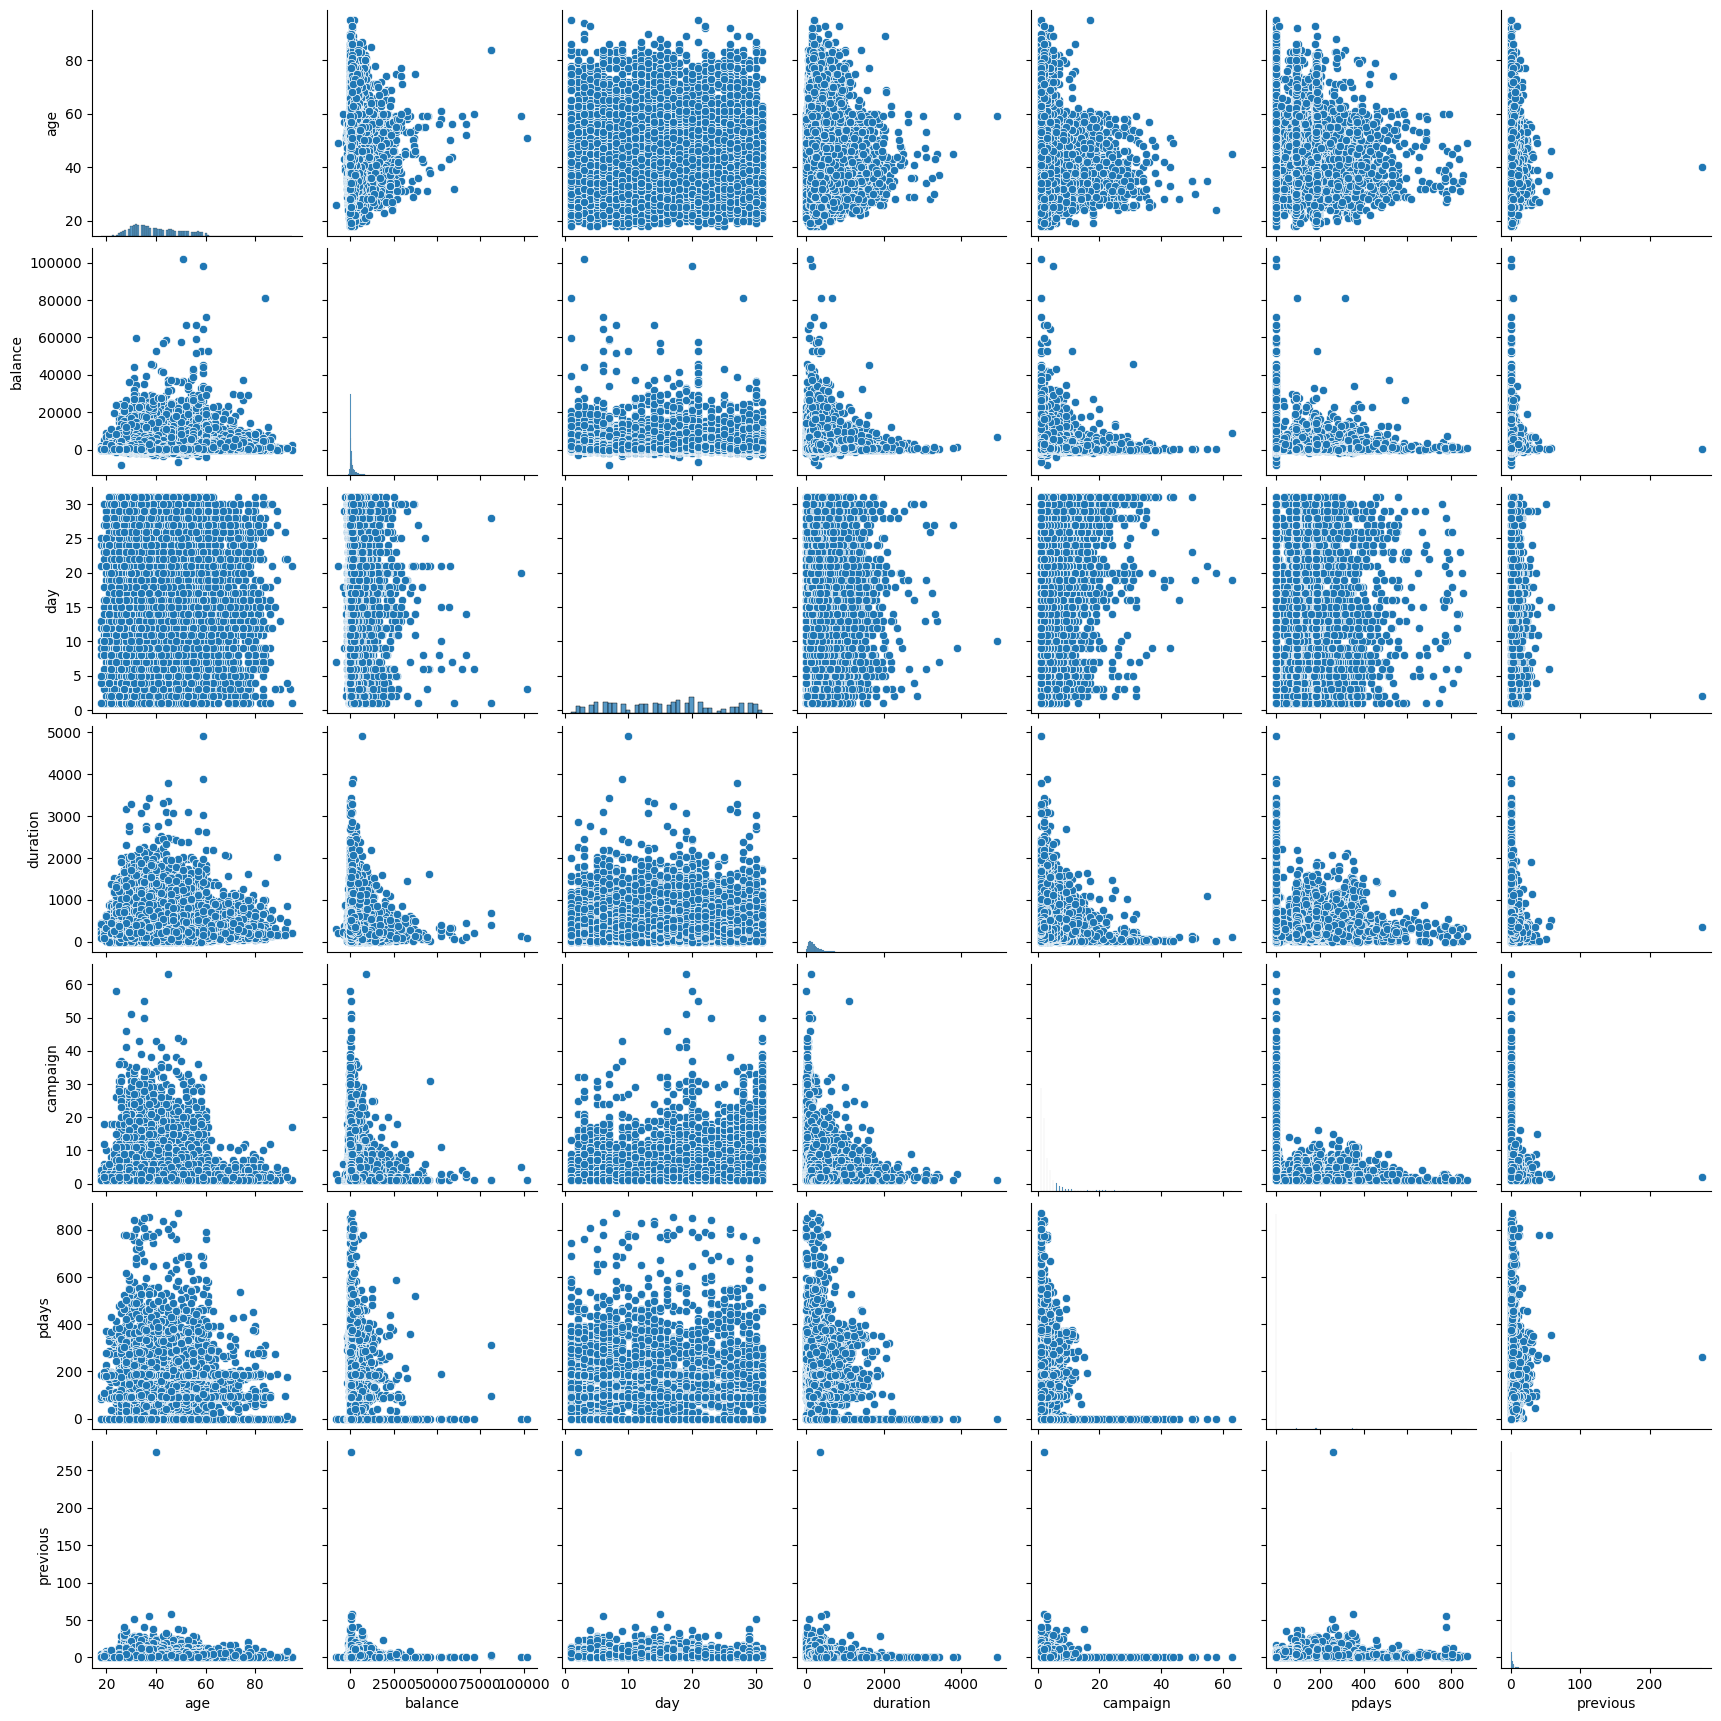

In [9]:
sns.pairplot(data=df_full)

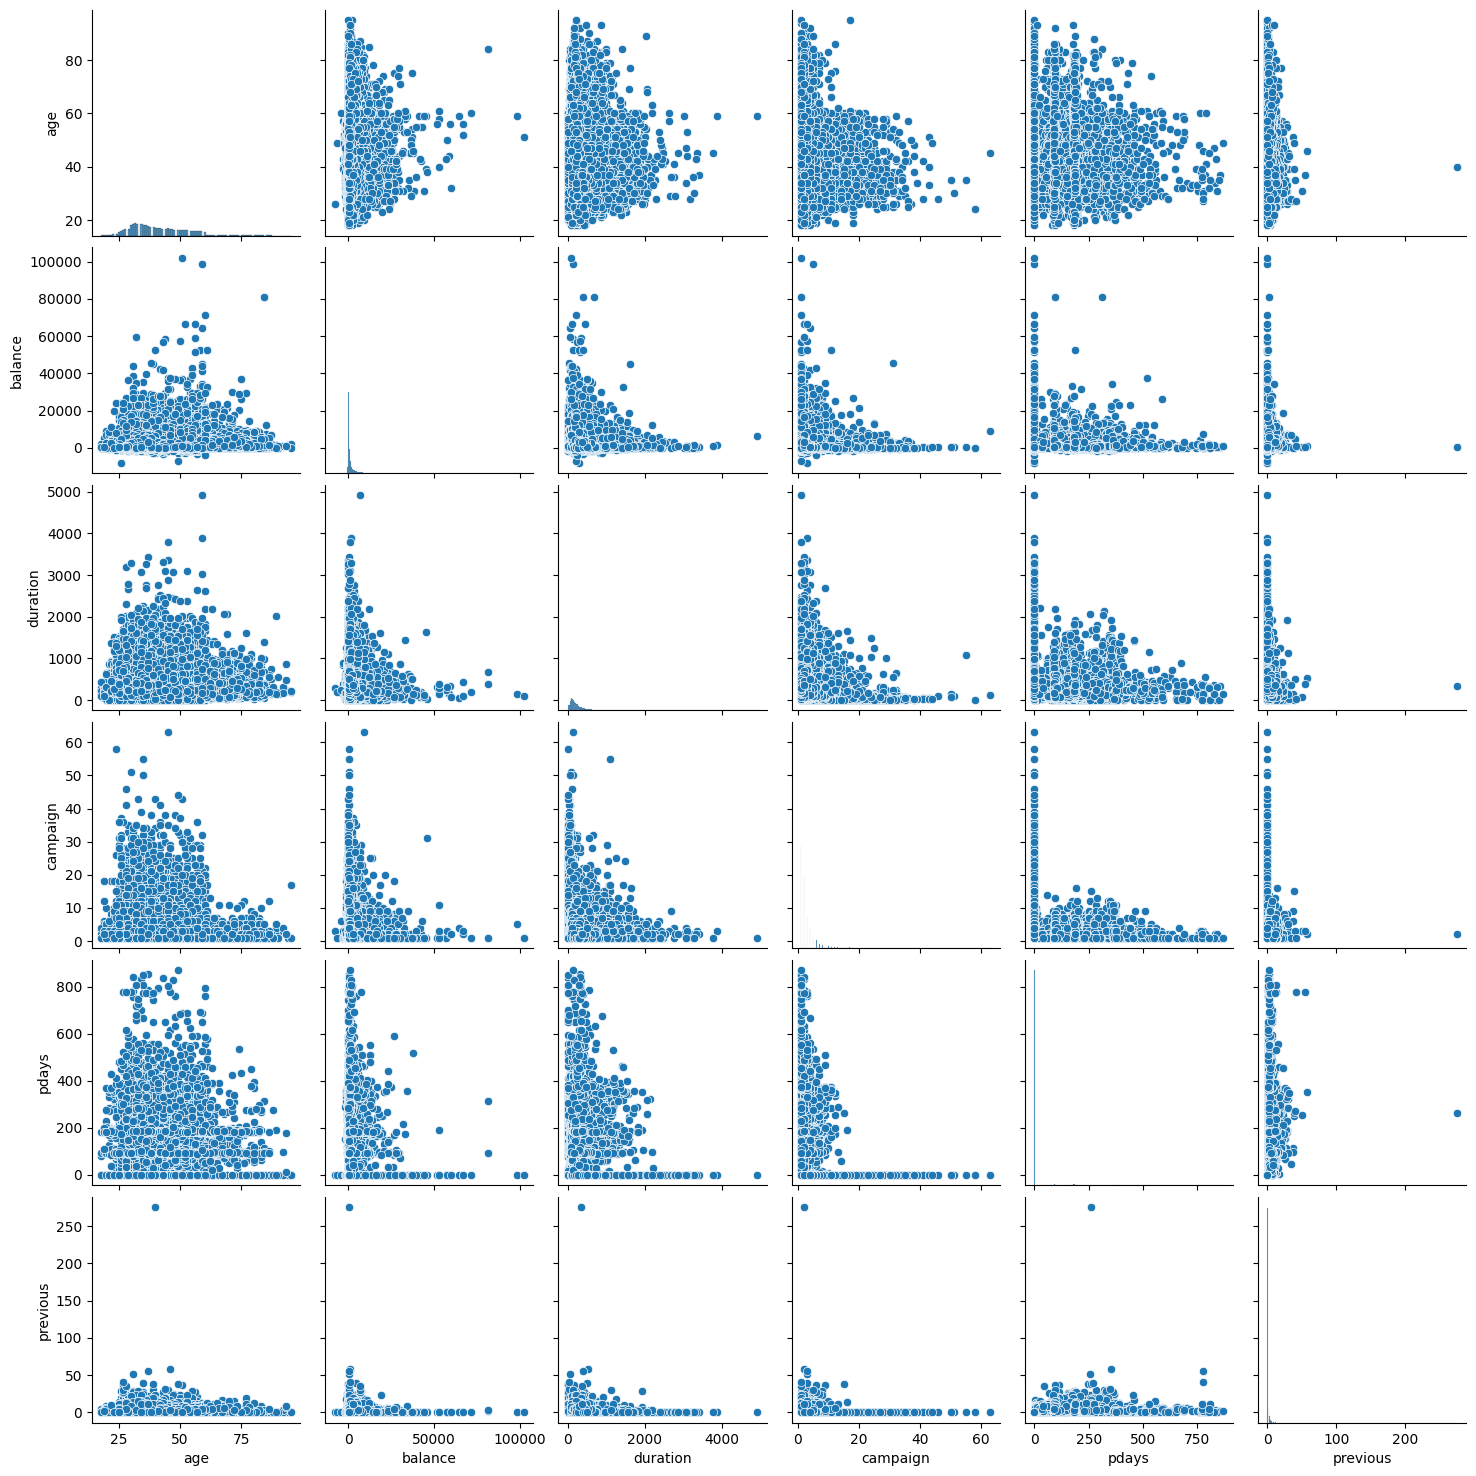

In [10]:
selected_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
sns.pairplot(data=df_full, vars=selected_columns)

In [11]:
df_full['day2'] = df_full.day.astype(str)

In [12]:
qualitative_columns = df_full.select_dtypes(exclude=np.number).columns
for c in qualitative_columns:
    if df_full[c].isnull().any:
        df_full[c]=df_full[c].fillna('MISSING')

In [13]:
df_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,day2
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,5


In [14]:
for col in qualitative_columns:
    print(f"\n{col} value counts:")
    print(df_full[col].value_counts(normalize=True).head(10))



job value counts:
job
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
Name: proportion, dtype: float64

marital value counts:
marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64

education value counts:
education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64

default value counts:
default
no     0.981973
yes    0.018027
Name: proportion, dtype: float64

housing value counts:
housing
yes    0.555838
no     0.444162
Name: proportion, dtype: float64

loan value counts:
loan
no     0.839774
yes    0.160226
Name: proportion, dtype: float64

contact value counts:
contact
cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: proportion, dtyp

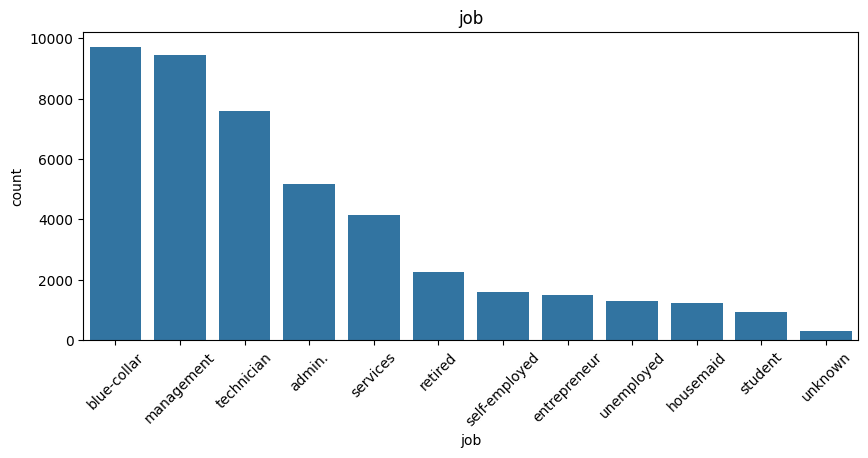

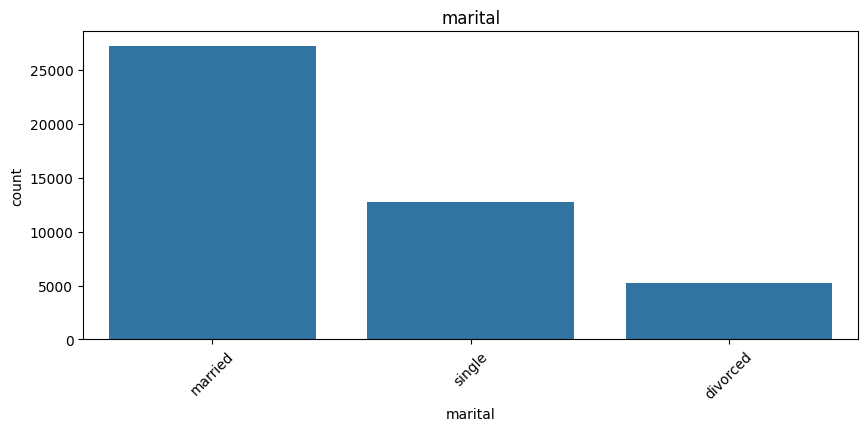

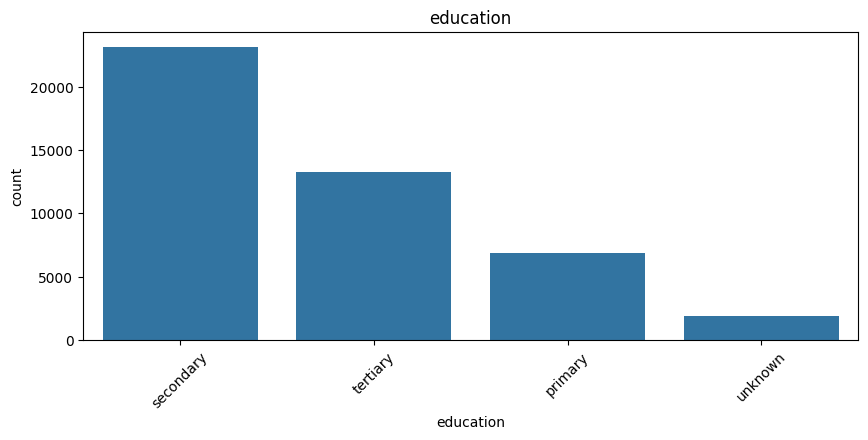

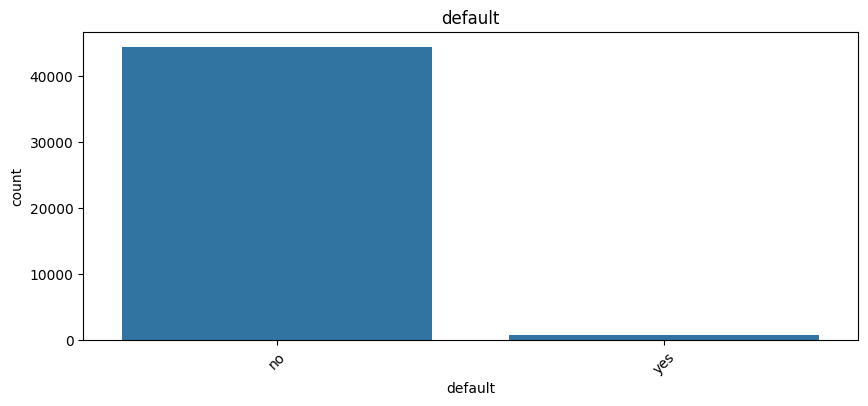

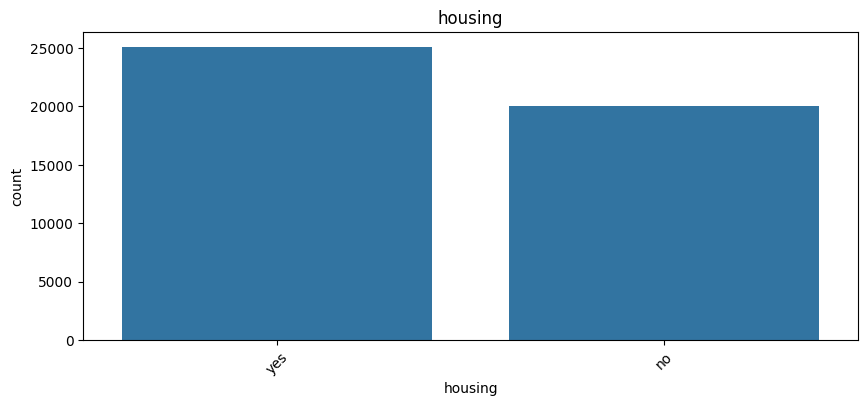

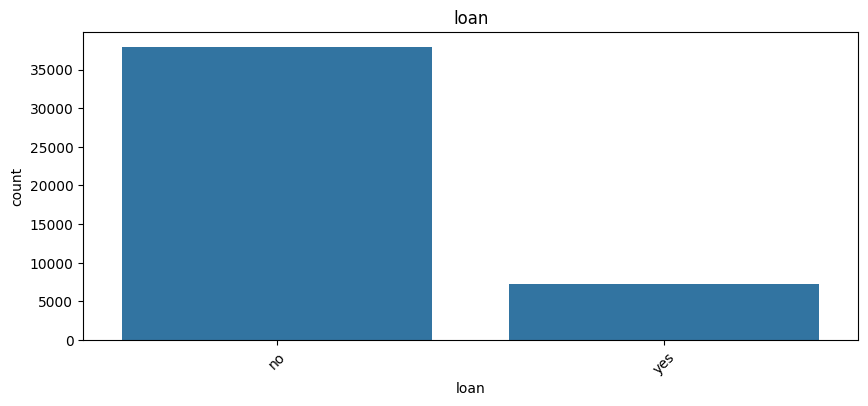

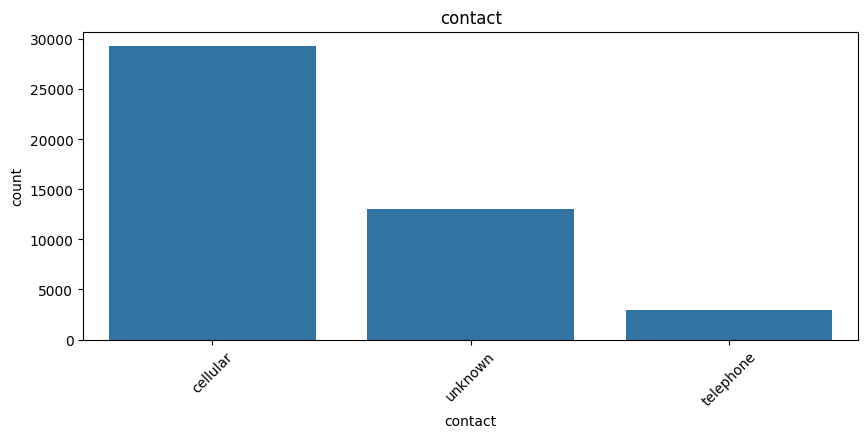

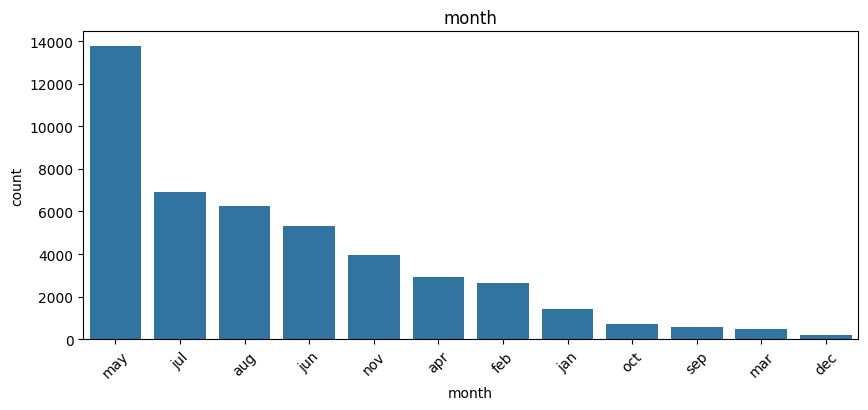

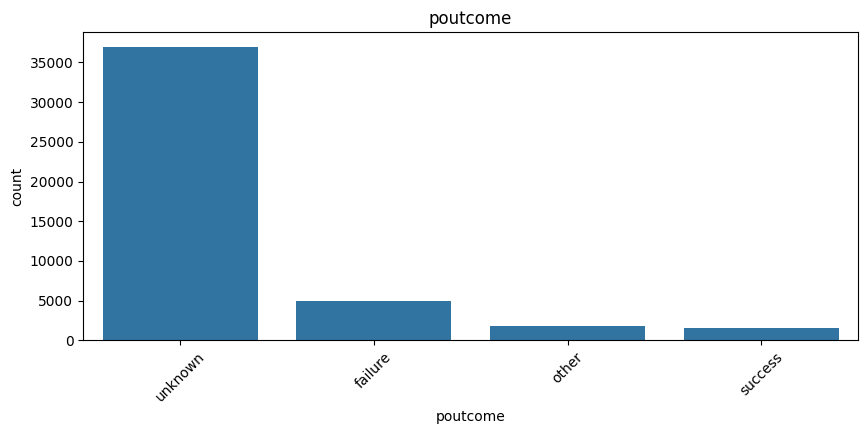

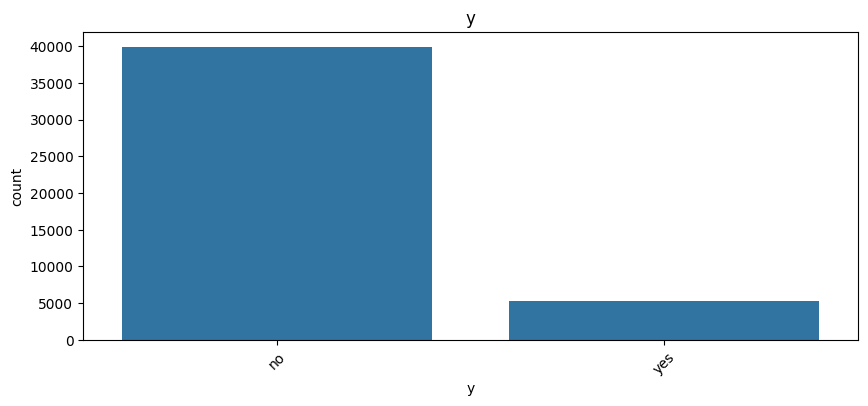

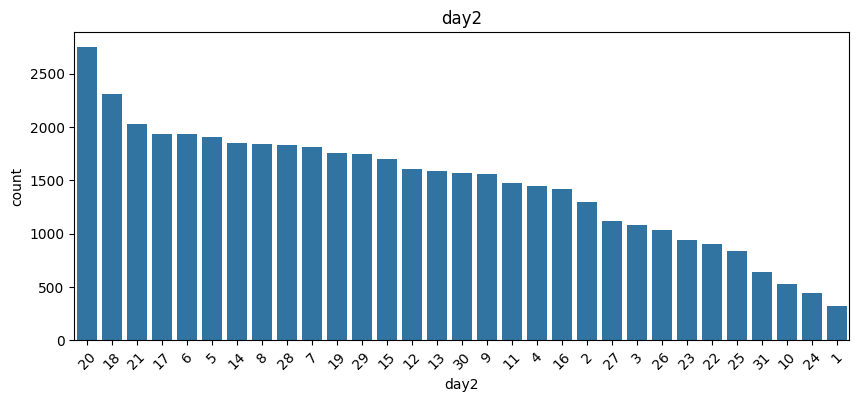

In [15]:
for col in qualitative_columns:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df_full, x=col, order=df_full[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()


In [16]:
df_full.groupby("job")["balance"].mean().sort_values()


job
services          997.088108
blue-collar      1078.826654
admin.           1135.838909
technician       1252.632092
student          1388.060768
housemaid        1392.395161
entrepreneur     1521.470074
unemployed       1521.745971
self-employed    1647.970868
management       1763.616832
unknown          1772.357639
retired          1984.215106
Name: balance, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

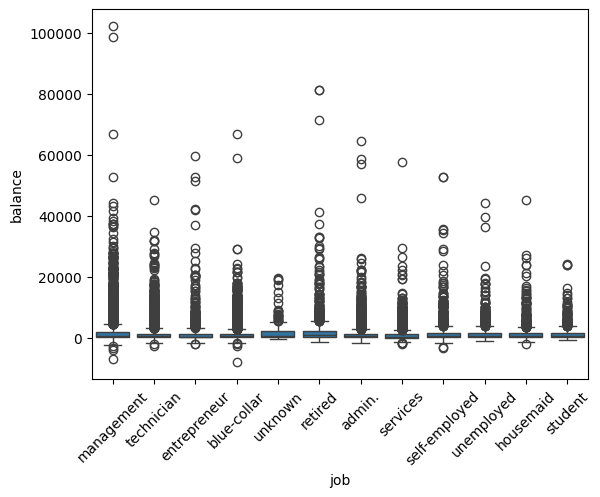

In [17]:
sns.boxplot(data=df_full, x="job", y="balance")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

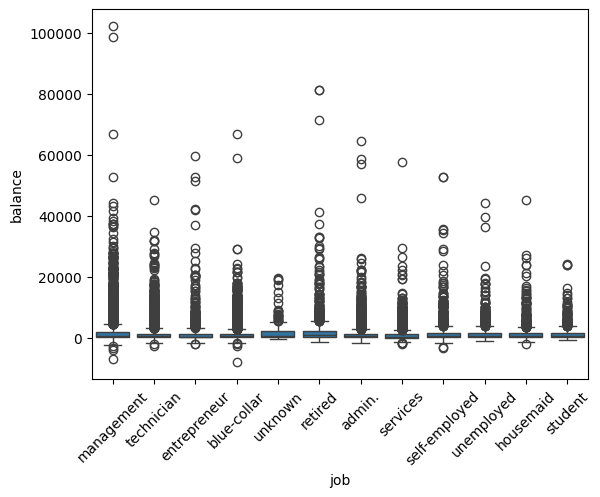

In [18]:
sns.boxplot(data=df_full, x="job", y="balance")
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'married'), Text(1, 0, 'single'), Text(2, 0, 'divorced')])

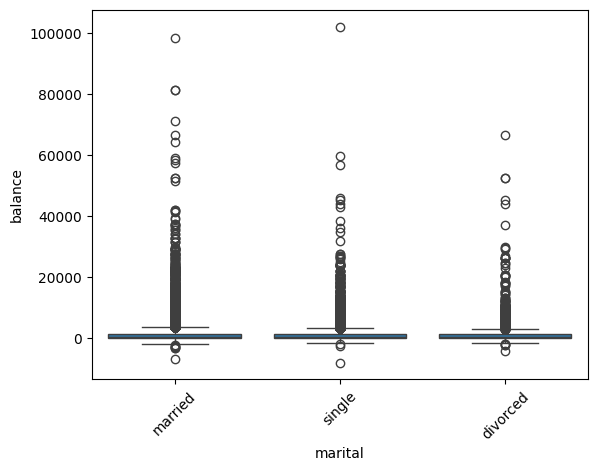

In [19]:
sns.boxplot(data=df_full, x="marital", y="balance")
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'tertiary'),
  Text(1, 0, 'secondary'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'primary')])

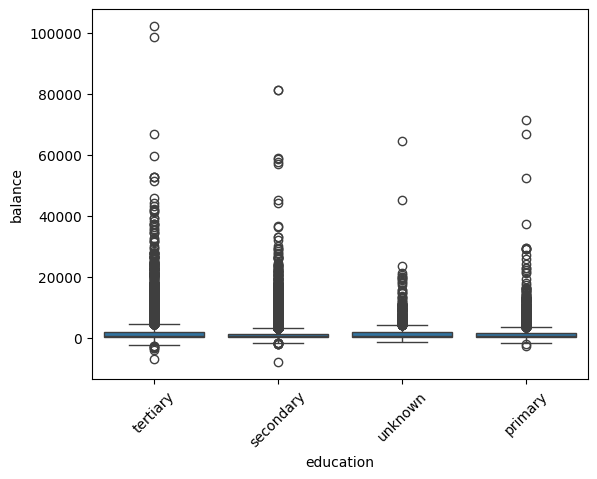

In [20]:
sns.boxplot(data=df_full, x="education", y="balance")
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])

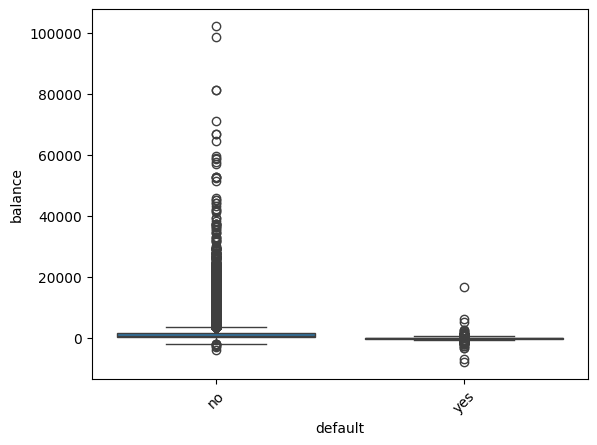

In [21]:
sns.boxplot(data=df_full, x="default", y="balance")
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'yes'), Text(1, 0, 'no')])

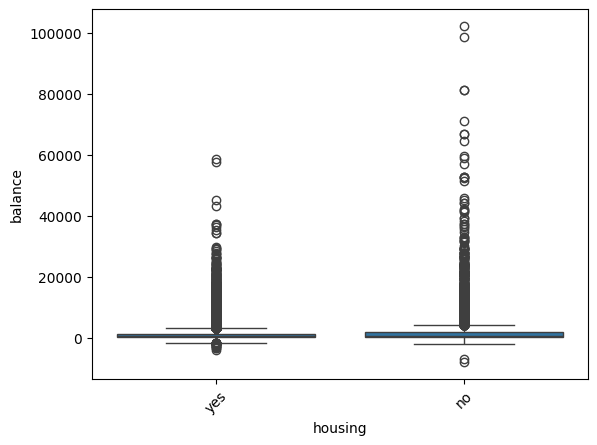

In [22]:
sns.boxplot(data=df_full, x="housing", y="balance")
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])

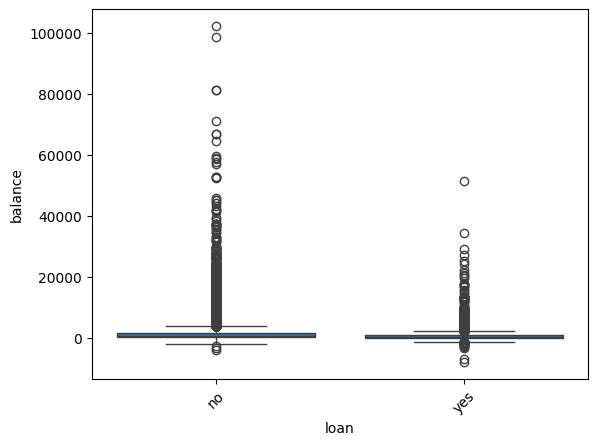

In [23]:
sns.boxplot(data=df_full, x="loan", y="balance")
plt.xticks(rotation=45)

In [24]:
df=df_full

selected_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
corr_mat = df[selected_columns].corr()
corr_mat

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.021560,-0.014578,0.003435,0.016674
duration,-0.004648,0.021560,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,0.001203,-0.032855,0.454820,1.000000


<Axes: >

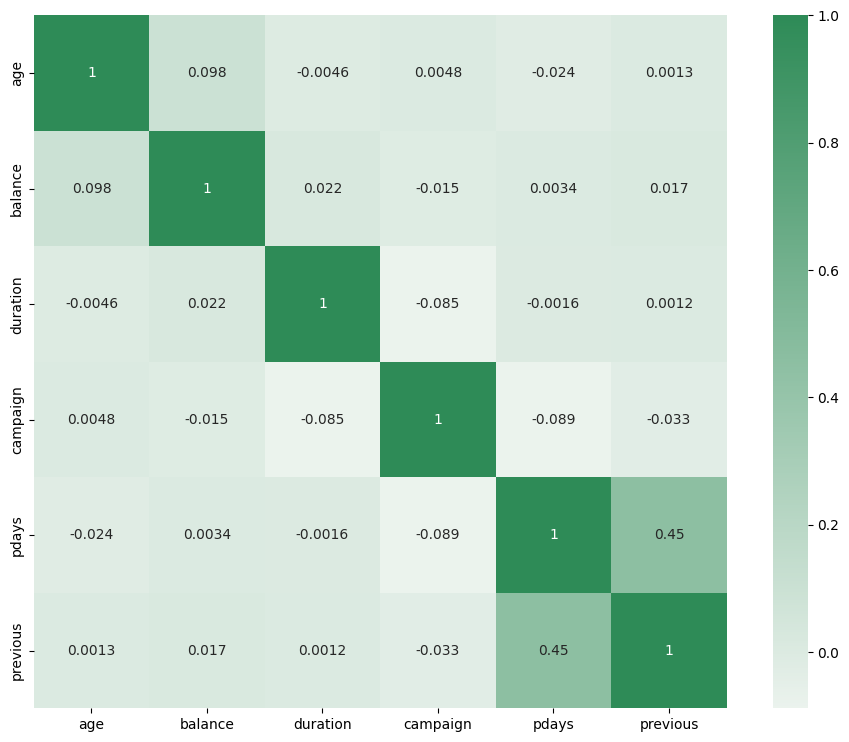

In [25]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, cmap=sns.light_palette("seagreen", as_cmap=True), vmax=1, square=True, annot=True)

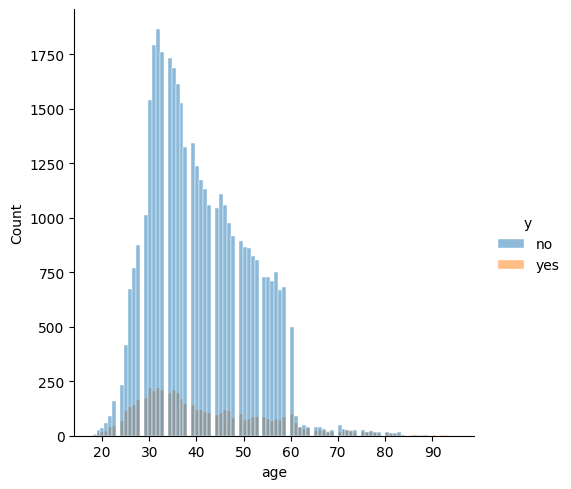

In [26]:
sns.displot(data=df_full, x='age', hue='y', edgecolor='white')

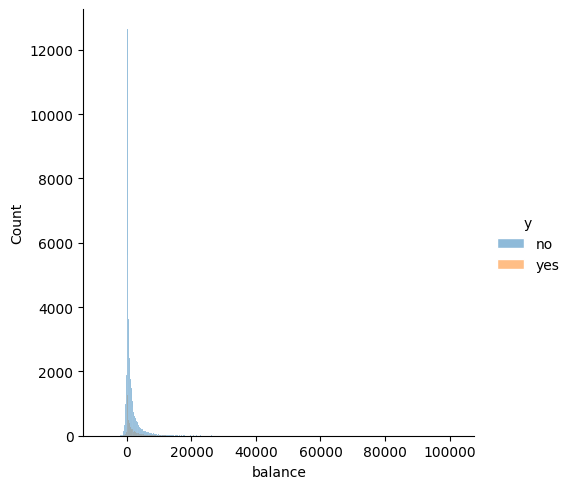

In [27]:
sns.displot(data=df_full, x='balance', hue='y', edgecolor='white')


job vs y:
 y                    no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056


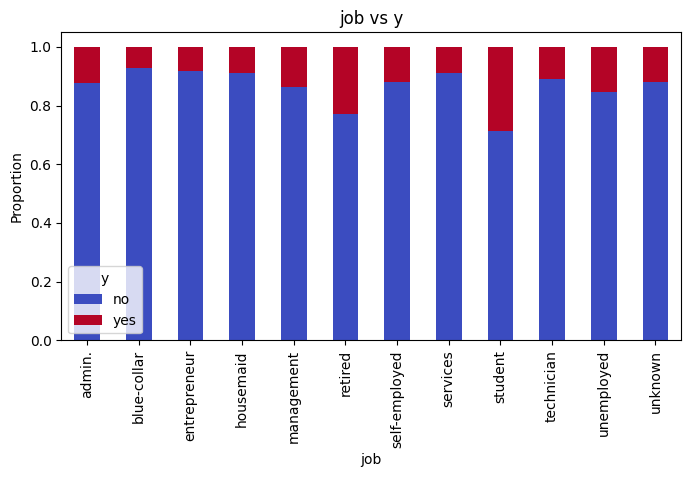


marital vs y:
 y               no       yes
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492


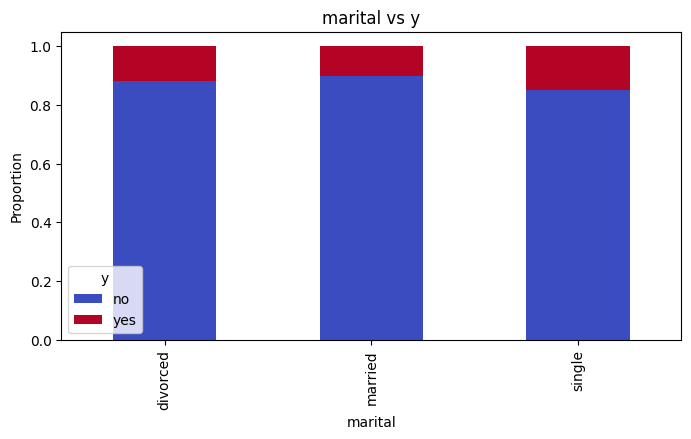


education vs y:
 y                no       yes
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064
unknown    0.864297  0.135703


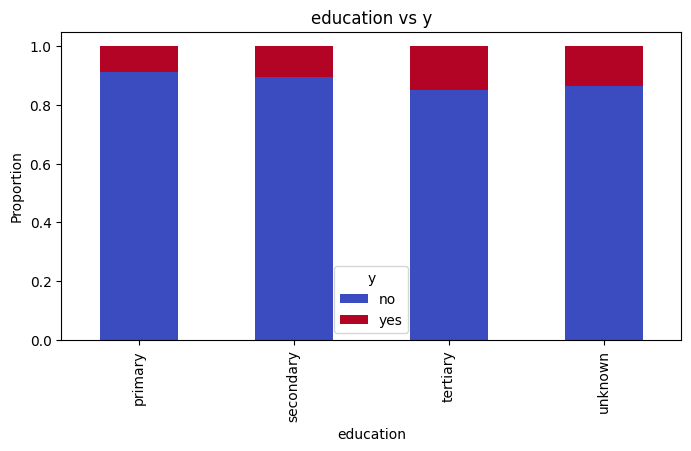


default vs y:
 y              no       yes
default                    
no       0.882039  0.117961
yes      0.936196  0.063804


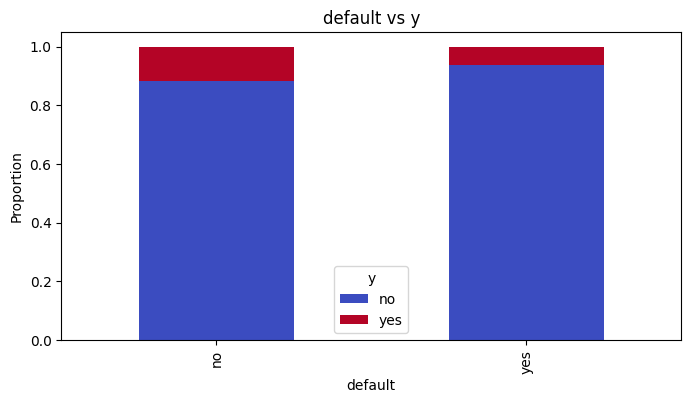


housing vs y:
 y              no       yes
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000


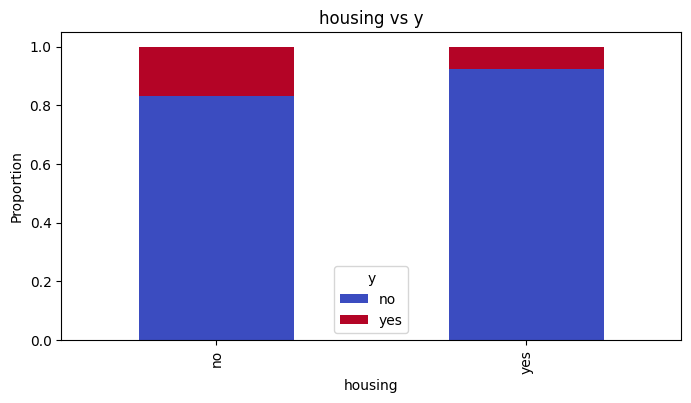


loan vs y:
 y           no       yes
loan                    
no    0.873443  0.126557
yes   0.933186  0.066814


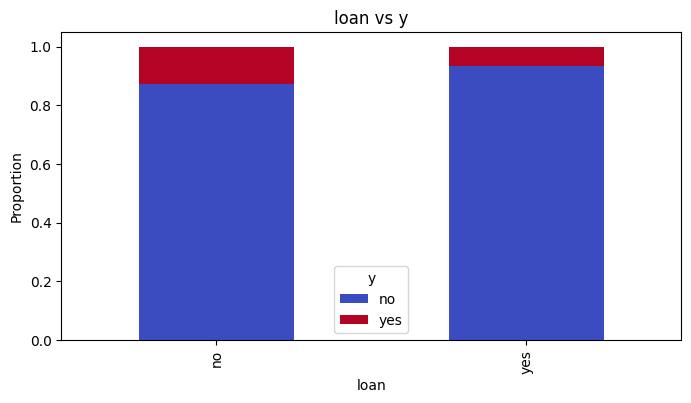


contact vs y:
 y                no       yes
contact                      
cellular   0.850811  0.149189
telephone  0.865795  0.134205
unknown    0.959293  0.040707


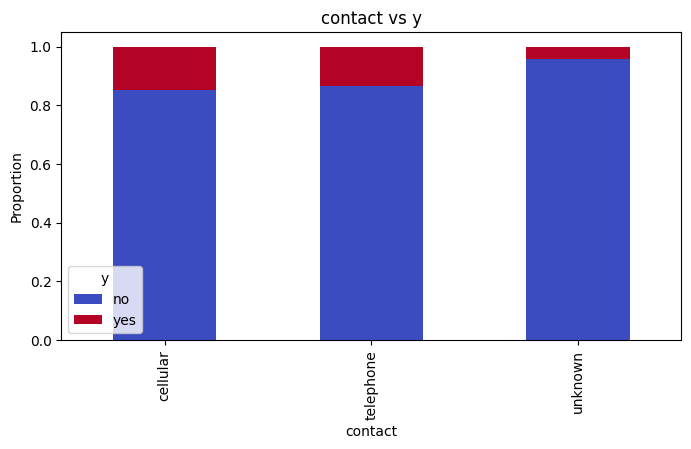


month vs y:
 y            no       yes
month                    
apr    0.803206  0.196794
aug    0.889867  0.110133
dec    0.532710  0.467290
feb    0.833522  0.166478
jan    0.898788  0.101212
jul    0.909065  0.090935
jun    0.897772  0.102228
mar    0.480084  0.519916
may    0.932805  0.067195
nov    0.898489  0.101511
oct    0.562331  0.437669
sep    0.535406  0.464594


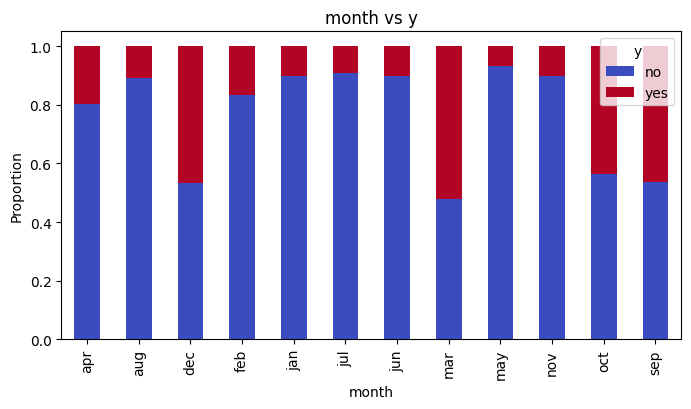


poutcome vs y:
 y               no       yes
poutcome                    
failure   0.873903  0.126097
other     0.833152  0.166848
success   0.352747  0.647253
unknown   0.908385  0.091615


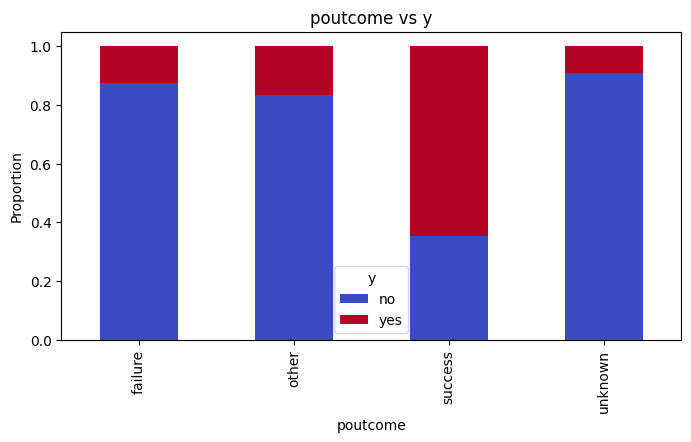


day2 vs y:
 y           no       yes
day2                    
1     0.720497  0.279503
10    0.769084  0.230916
11    0.877620  0.122380
12    0.847785  0.152215
13    0.847950  0.152050
14    0.886364  0.113636
15    0.860247  0.139753
16    0.864311  0.135689
17    0.909232  0.090768
18    0.901213  0.098787
19    0.930563  0.069437
2     0.859242  0.140758
20    0.930233  0.069767
21    0.900790  0.099210
22    0.829834  0.170166
23    0.865815  0.134185
24    0.861298  0.138702
25    0.841667  0.158333
26    0.887923  0.112077
27    0.866191  0.133809
28    0.921858  0.078142
29    0.926074  0.073926
3     0.835032  0.164968
30    0.826948  0.173052
31    0.928460  0.071540
4     0.840830  0.159170
5     0.887435  0.112565
6     0.906315  0.093685
7     0.913594  0.086406
8     0.890879  0.109121
9     0.885330  0.114670


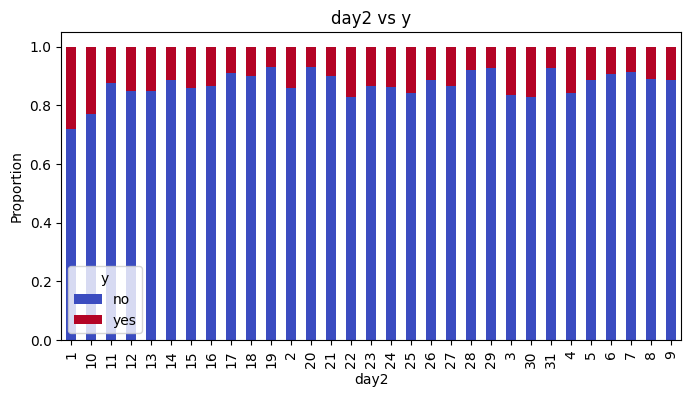

In [28]:
for col in qualitative_columns:
    if col == "y":  # vynecháme cílovou proměnnou jako kategorii proti sobě samé
        continue
    
    ct = pd.crosstab(df_full[col], df_full["y"], normalize="index")
    print(f"\n{col} vs y:\n", ct)
    
    ct.plot(kind="bar", stacked=True, figsize=(8,4), colormap="coolwarm")
    plt.title(f"{col} vs y")
    plt.ylabel("Proportion")
    plt.show()

In [29]:
df_full_2 = pd.read_csv('bank-full.csv', sep=";")
df_full_2.isna().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [30]:
df_clustering = df_full_2

In [31]:
df_clustering.shape

(45211, 17)

In [32]:
df_clustering.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [33]:
df_encoded = pd.DataFrame(index = df_clustering.index)

In [34]:
cat_cols = df_clustering.select_dtypes(exclude='number').columns.tolist()
df_encoded = pd.get_dummies(df_clustering[cat_cols])
df_encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,True,False
2,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
3,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False


In [35]:
numeric_columns = df_clustering.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.difference(df_encoded.columns)
numeric_columns

Index(['age', 'balance', 'campaign', 'day', 'duration', 'pdays', 'previous'], dtype='object')

In [36]:
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(df_clustering[numeric_columns])

In [37]:
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

In [38]:
df_encoded = df_encoded.join(scaled_numeric_df)

df_encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_unknown,y_no,y_yes,age,balance,campaign,day,duration,pdays,previous
0,False,False,False,False,True,False,False,False,False,False,...,True,True,False,0.519481,0.092259,0.0,0.133333,0.053070,0.0,0.0
1,False,False,False,False,False,False,False,False,False,True,...,True,True,False,0.337662,0.073067,0.0,0.133333,0.030704,0.0,0.0
2,False,False,True,False,False,False,False,False,False,False,...,True,True,False,0.194805,0.072822,0.0,0.133333,0.015453,0.0,0.0
3,False,True,False,False,False,False,False,False,False,False,...,True,True,False,0.376623,0.086476,0.0,0.133333,0.018707,0.0,0.0
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,0.194805,0.072812,0.0,0.133333,0.040260,0.0,0.0


**<p style="font-size:40px">K MEANS</p>**

In [73]:
import sklearn
from sklearn.decomposition import PCA
import copy
from sklearn.manifold import TSNE

In [72]:
X = copy.deepcopy(df_encoded)

In [41]:
'''clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')'''

In [42]:
#df_clustering_scores

,sse,silhouette
k,,
2,190168.213855,0.124165
3,178275.641726,0.117094
4,166060.802809,0.113483
5,160922.976740,0.111740
6,154552.193566,0.118910
7,149351.141229,0.116485
8,147514.340378,0.109149
9,144250.255716,0.106216
10,140791.414615,0.107223


<Axes: xlabel='k', ylabel='sse'>

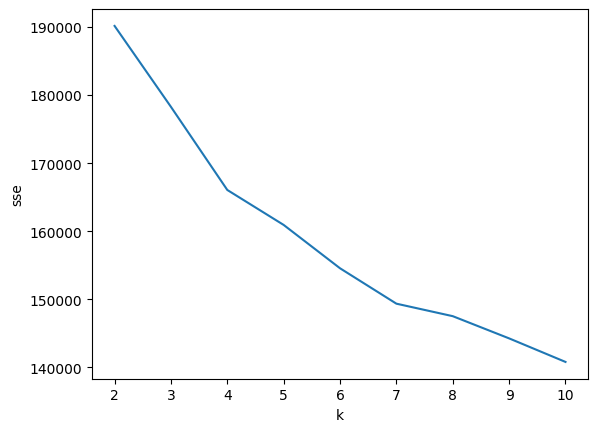

In [43]:
#sns.lineplot(data = df_clustering_scores, y='sse', x='k')

<Axes: xlabel='k', ylabel='silhouette'>

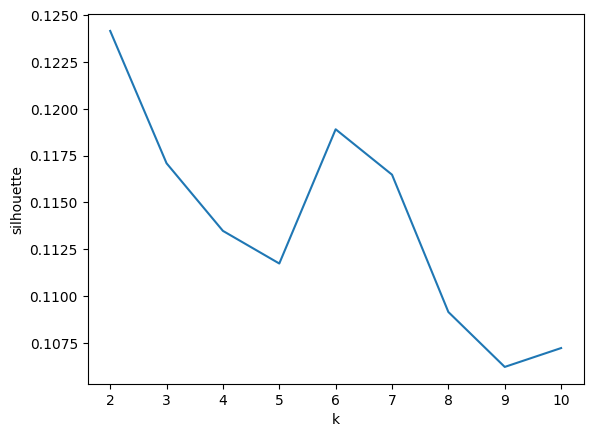

In [44]:
#sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

In [46]:
clustering = sklearn.cluster.KMeans(n_clusters=2, random_state=13)
clustering.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,13
,copy_x,True
,algorithm,'lloyd'


In [47]:
pd.Series(clustering.labels_).value_counts()

0    25130
1    20081
Name: count, dtype: int64

In [75]:
X['cluster_id'] = clustering.labels_
X.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,y_no,y_yes,age,balance,campaign,day,duration,pdays,previous,cluster_id
0,False,False,False,False,True,False,False,False,False,False,...,True,False,0.519481,0.092259,0.0,0.133333,0.053070,0.0,0.0,0
1,False,False,False,False,False,False,False,False,False,True,...,True,False,0.337662,0.073067,0.0,0.133333,0.030704,0.0,0.0,0
2,False,False,True,False,False,False,False,False,False,False,...,True,False,0.194805,0.072822,0.0,0.133333,0.015453,0.0,0.0,0
3,False,True,False,False,False,False,False,False,False,False,...,True,False,0.376623,0.086476,0.0,0.133333,0.018707,0.0,0.0,0
4,False,False,False,False,False,False,False,False,False,False,...,True,False,0.194805,0.072812,0.0,0.133333,0.040260,0.0,0.0,1


In [74]:
tsne = TSNE(n_components=2, perplexity=30, random_state=13)
X_tsne = tsne.fit_transform(X)

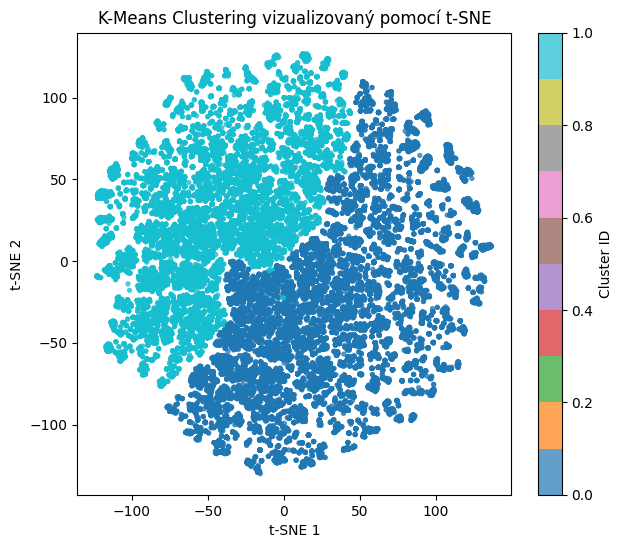

In [76]:
plt.figure(figsize=(7,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X['cluster_id'], cmap='tab10', s=8, alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("K-Means Clustering vizualizovaný pomocí t-SNE")
plt.colorbar(label="Cluster ID")
plt.show()

**<p style="font-size:40px">Hierarchické shlukování</p>**

In [88]:
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import fcluster

In [80]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Credit to https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(linkage_matrix, **kwargs)
    plt.ylabel('distance')

In [78]:
X_agglomerative = copy.deepcopy(df_encoded)

In [84]:
clustering_agglomerative = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None,  compute_distances=True).fit(X_agglomerative)

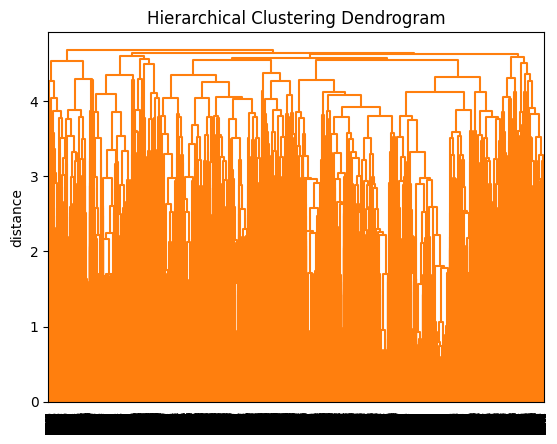

In [85]:
plot_dendrogram(clustering_agglomerative, labels=clustering_agglomerative.labels_, color_threshold=999)

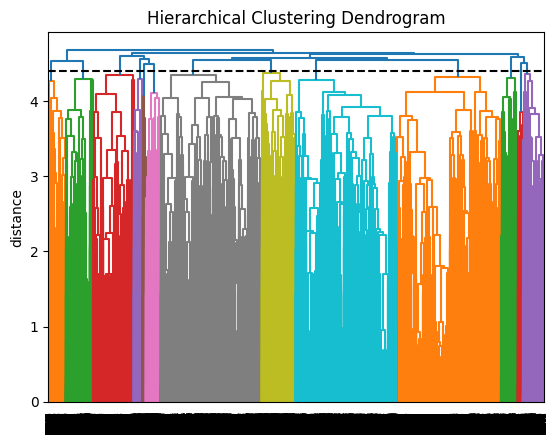

In [86]:
plot_dendrogram(clustering_agglomerative, labels=clustering_agglomerative.labels_, color_threshold=4.4)
plt.axhline(y=4.4, color='black', linestyle='--')

In [93]:
tsne_agglomerative = TSNE(n_components=2, perplexity=30, random_state=13)
X_tsne_agglomerative = tsne_agglomerative.fit_transform(X_agglomerative)

In [94]:
def sklearn_to_linkage(model):
    n_samples = len(model.labels_)
    counts = np.zeros(model.children_.shape[0])
    for i, (left, right) in enumerate(model.children_):
        c = (1 if left  < n_samples else counts[left  - n_samples]) + \
            (1 if right < n_samples else counts[right - n_samples])
        counts[i] = c
    Z = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    return Z

Z = sklearn_to_linkage(clustering_agglomerative)

In [95]:
labels = fcluster(Z, t=4.4, criterion='distance') - 1   # na 0-based


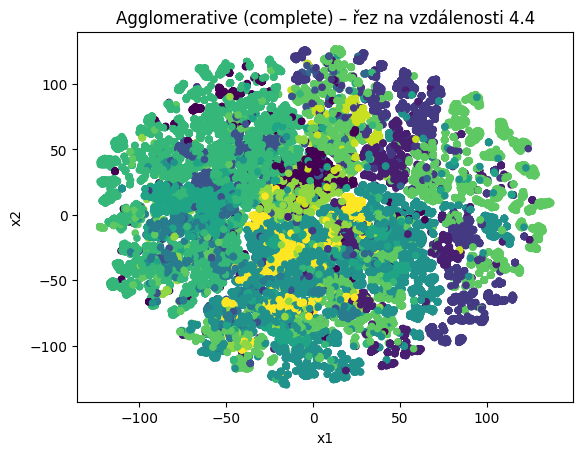

In [97]:
plt.figure()
plt.scatter(X_tsne_agglomerative[:, 0], X_tsne_agglomerative[:, 1], c=labels, s=20)
plt.title('Agglomerative (complete) – řez na vzdálenosti 4.4')
plt.xlabel('x1'); plt.ylabel('x2')
plt.show()

**<p style="font-size:40px">DB scan</p>**

In [98]:
X_dbscan = copy.deepcopy(df_encoded)

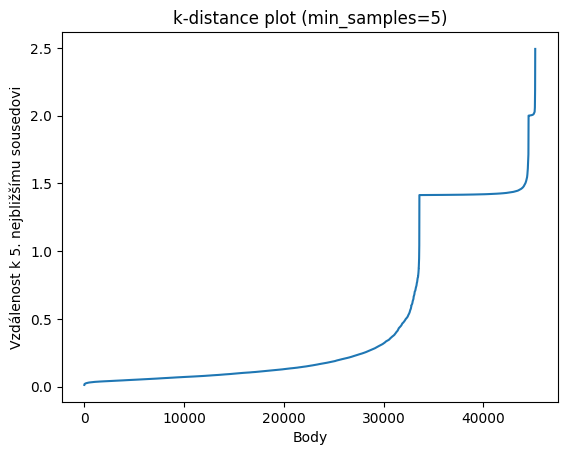

In [102]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_dbscan)
distances, indices = nbrs.kneighbors(X_dbscan)

# seřaď vzdálenosti a vykresli
distances = np.sort(distances[:,4])
plt.plot(distances)
plt.title("k-distance plot (min_samples=5)")
plt.xlabel("Body")
plt.ylabel("Vzdálenost k 5. nejbližšímu sousedovi")
plt.show()

In [154]:
dbscan = DBSCAN(eps=1.4, min_samples=300, metric='euclidean')
labels = dbscan.fit_predict(X_dbscan)

In [155]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Počet shluků: {n_clusters}")
print(f"Počet šumových bodů: {n_noise}")

Počet shluků: 7
Počet šumových bodů: 41768


In [147]:
tsneX_dbscan = TSNE(n_components=2, perplexity=30, random_state=13)
X_tsneX_dbscan = tsneX_dbscan.fit_transform(X_dbscan)

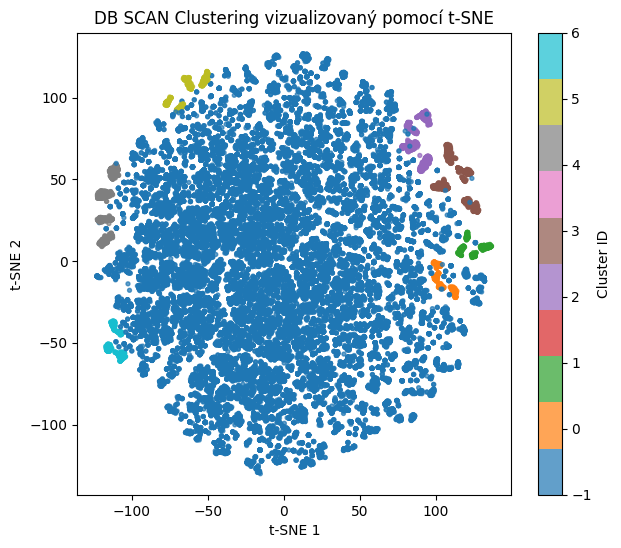

In [150]:
plt.figure(figsize=(7,6))
plt.scatter(X_tsneX_dbscan[:, 0], X_tsneX_dbscan[:, 1], c=labels, cmap='tab10', s=8, alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("DB SCAN Clustering vizualizovaný pomocí t-SNE")
plt.colorbar(label="Cluster ID")
plt.show()

In [151]:
k = 300
nbrs = NearestNeighbors(n_neighbors=k).fit(X_agglomerative)
dists = np.sort(nbrs.kneighbors(X_agglomerative)[0][:, k-1])
eps = float(np.percentile(dists, 95))   # nebo vizuálně z „kolínka“
print("navržené eps:", eps)

navržené eps: 2.453701084761242
